# Classifying with scikit-learn Estimators

The scikit-learn library is a collection of data mining algorithms, written in Python and using a common programming interface. Here, we focus on setting up a good framework for running data mining
procedures. 

Key concepts:
- **Estimators**: This is to perform classification, clustering, and regression
- **Transformers**: This is to perform preprocessing and data alterations
- **Pipelines**: This is to put together your workflow into a replicable format

## scikit-learn estimators

Estimators are `scikit-learn`'s abstraction, allowing for the standardized implementation of a large number of classification algorithms. Estimators are used for classification. Estimators have the following two main functions:
- `fit()`: This performs the training of the algorithm and sets internal parameters. It takes two inputs, the training sample dataset and the corresponding classes for those samples.
- `predict()`: This predicts the class of the testing samples that is given as input. This function returns an array with the predictions of each input testing sample.

Most `scikit-learn` estimators use the NumPy arrays or a related format for input and output.

There are a large number of estimators in scikit-learn. These include **support vector machines (SVM)**, **random forests**, and **neural networks**. Here, we will use a different estimator from scikit-learn: **nearest neighbor**.

## Nearest neighbors

**Nearest neighbors** is perhaps one of the most intuitive algorithms in the set of standard data mining algorithms. To predict the class of a new sample, we look through the training dataset for the samples that are most similar to our new sample. We take the most similar sample and predict the class that the majority of those samples have.

**Example**: If we wish to predict the class of the triangle, based on which class it is more similar to (represented here by having similar objects closer together). We seek the three nearest neighbors, which are two diamonds and one square. There are more diamonds than circles, and the predicted class for the triangle is, therefore, a diamond:

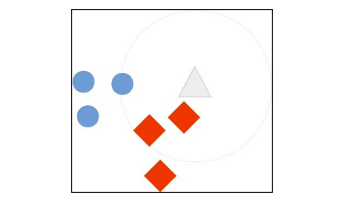

**Caution**: Nearest neighbors can be used for nearly any dataset-however, it can be very computationally expensive to compute the distance between all pairs of samples. For example if there are 10 samples in the dataset, there are 45 unique distances to compute. However, if there are 1000 samples, there are nearly 500,000! Various methods exist for improving this speed dramatically. It can also do poorly in categorical-based datasets, and another algorithm should be used for these instead.

## Distance metrics

## Loading the dataset

## Moving towards a standard workflow

## Running the algorithm

## Setting parameters

## Preprocessing using pipelines

## An example

## Standard preprocessing

## Putting it all together

## Pipelines

In [ ]:
%matplotlib inline

In [ ]:
import os
home_folder = os.path.expanduser("~")
print(home_folder)

In [ ]:
# Change this to the location of your dataset
data_folder = os.path.join(home_folder, "Data", "Ionosphere")
data_filename = os.path.join(data_folder, "ionosphere.data")
print(data_filename)

In [ ]:
import csv
import numpy as np

# Size taken from the dataset and is known
X = np.zeros((351, 34), dtype='float')
y = np.zeros((351,), dtype='bool')

with open(data_filename, 'r') as input_file:
    reader = csv.reader(input_file)
    for i, row in enumerate(reader):
        # Get the data, converting each item to a float
        data = [float(datum) for datum in row[:-1]]
        # Set the appropriate row in our dataset
        X[i] = data
        # 1 if the class is 'g', 0 otherwise
        y[i] = row[-1] == 'g'

In [ ]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()

In [ ]:
estimator.fit(X_train, y_train)

In [ ]:
y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted) * 100
print("The accuracy is {0:.1f}%".format(accuracy))

In [ ]:
from sklearn.cross_validation import cross_val_score

In [ ]:
scores = cross_val_score(estimator, X, y, scoring='accuracy')
average_accuracy = np.mean(scores) * 100
print("The average accuracy is {0:.1f}%".format(average_accuracy))

In [ ]:
avg_scores = []
all_scores = []
parameter_values = list(range(1, 21))  # Including 20
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, y, scoring='accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

In [ ]:
plt.plot?

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(32,20))
plt.plot(parameter_values, avg_scores, '-o', linewidth=5, markersize=24)
#plt.axis([0, max(parameter_values), 0, 1.0])

In [ ]:
for parameter, scores in zip(parameter_values, all_scores):
    n_scores = len(scores)
    plt.plot([parameter] * n_scores, scores, '-o')

In [ ]:
plt.plot(parameter_values, all_scores, 'bx')

In [ ]:
from collections import defaultdict
all_scores = defaultdict(list)
parameter_values = list(range(1, 21))  # Including 20
for n_neighbors in parameter_values:
    for i in range(100):
        estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
        scores = cross_val_score(estimator, X, y, scoring='accuracy', cv=10)
        all_scores[n_neighbors].append(scores)
for parameter in parameter_values:
    scores = all_scores[parameter]
    n_scores = len(scores)
    plt.plot([parameter] * n_scores, scores, '-o')

In [ ]:
plt.plot(parameter_values, avg_scores, '-o')

In [ ]:
X_broken = np.array(X)
X_broken[:,::2] /= 10

estimator = KNeighborsClassifier()
original_scores = cross_val_score(estimator, X, y,
 scoring='accuracy')
print("The original average accuracy for is {0:.1f}%".format(np.mean(original_scores) * 100))
broken_scores = cross_val_score(estimator, X_broken, y,
 scoring='accuracy')
print("The 'broken' average accuracy for is {0:.1f}%".format(np.mean(broken_scores) * 100))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_transformed = MinMaxScaler().fit_transform(X_broken)
estimator = KNeighborsClassifier()
transformed_scores = cross_val_score(estimator, X_transformed, y,
 scoring='accuracy')
print("The average accuracy for is {0:.1f}%".format(np.mean(transformed_scores) * 100))